In [1]:
first_name = 'Clement'
last_name = 'Bannem'

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import timeseries as ts
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.externals import joblib
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import itertools
import seaborn as sns
from numpy import where
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# Each record describes characteristics of day ahead prices

da_data = pd.read_csv("DayAheadAuctionEPEXSPOT_Jan2014_Dec2018.csv")

In [ ]:
# da_data.drop(da_data.columns[[0]], axis = 1, inplace = True)

In [4]:
da_data.head()

,DateTime,Prices,Volume,MiddleNight,EarlyMorning,LateMorning,EarlyAfternoon,RushHour,OffPeak2,Night,...,OffPeak,Morning,HighNoon,Afternoon,Evening,SunPeak,BasePrice,BaseVolume,PeakPrice,PeakVolume
0,01-01-14 0:00,15.15,4699.1,12.98,10.6,11.56,12.82,15.21,14.4,12.93,...,11.79,12.19,12.66,10.13,13.51,12.43,12.93,149693.7,NaN,NaN
1,01-01-14 1:00,12.96,4922.1,12.98,10.6,11.56,12.82,15.21,14.4,12.93,...,11.79,12.19,12.66,10.13,13.51,12.43,12.93,149693.7,NaN,NaN
2,01-01-14 2:00,12.09,6069.2,12.98,10.6,11.56,12.82,15.21,14.4,12.93,...,11.79,12.19,12.66,10.13,13.51,12.43,12.93,149693.7,NaN,NaN
3,01-01-14 3:00,11.70,6217.8,12.98,10.6,11.56,12.82,15.21,14.4,12.93,...,11.79,12.19,12.66,10.13,13.51,12.43,12.93,149693.7,NaN,NaN
4,01-01-14 4:00,11.66,6539.4,12.98,10.6,11.56,12.82,15.21,14.4,12.93,...,11.79,12.19,12.66,10.13,13.51,12.43,12.93,149693.7,NaN,NaN


In [5]:
#print the shape of the dataset
print(da_data.shape)

(43854, 22)


In [6]:
#Print the number of missing values per columns
print(da_data.isnull().sum(),"\n")

DateTime              0
Prices               30
Volume               30
MiddleNight           0
EarlyMorning          0
LateMorning           0
EarlyAfternoon        0
RushHour              0
OffPeak2              0
Night                 0
OffPeak1              0
Business              0
OffPeak               0
Morning               0
HighNoon              0
Afternoon             0
Evening               0
SunPeak               0
BasePrice             0
BaseVolume            0
PeakPrice         43854
PeakVolume        43854
dtype: int64 



### Cleaning

In [7]:
# We delete the columns with 100% of NaNs
da_data.drop('PeakPrice', axis = 1, inplace = True)
da_data.drop('PeakVolume', axis = 1, inplace = True)

In [8]:
da_data[da_data['Prices'].isnull()]

,DateTime,Prices,Volume,MiddleNight,EarlyMorning,LateMorning,EarlyAfternoon,RushHour,OffPeak2,Night,OffPeak1,Business,OffPeak,Morning,HighNoon,Afternoon,Evening,SunPeak,BasePrice,BaseVolume
7034,21-10-14 2:00,NaN,NaN,29.01,33.83,44.45,36.67,37.82,37.38,36.52,39.65,27.91,31.42,40.56,33.40,44.75,39.62,33.70,36.52,179994.1
7059,22-10-14 2:00,NaN,NaN,17.34,24.40,50.88,45.09,48.50,52.73,39.82,48.16,14.40,20.87,47.99,31.49,45.62,49.16,41.45,39.82,184983.9
7084,23-10-14 2:00,NaN,NaN,43.14,48.81,65.69,53.15,57.75,53.29,53.64,58.86,41.93,45.97,59.42,48.41,63.57,58.47,51.09,53.64,247187.3
7109,24-10-14 2:00,NaN,NaN,30.68,35.62,53.11,48.71,46.96,48.95,44.00,49.59,28.70,33.15,50.91,38.42,49.64,52.51,44.69,44.00,213880.6
7134,25-10-14 2:00,NaN,NaN,34.21,24.37,40.29,39.55,43.19,44.40,37.67,41.01,29.77,29.29,39.92,34.32,34.74,41.42,35.88,37.67,163794.2
7184,27-10-14 2:00,NaN,NaN,27.90,31.47,50.18,48.93,56.84,43.30,43.10,51.98,25.52,29.68,49.56,34.22,46.56,49.49,51.23,43.10,192348.9
15776,20-10-15 2:00,NaN,NaN,41.17,46.72,64.30,54.45,61.70,51.77,53.35,60.15,40.38,43.94,59.37,46.55,60.80,58.31,53.89,53.35,259010.0
15801,21-10-15 2:00,NaN,NaN,39.34,44.56,62.10,52.57,59.19,52.89,51.77,57.95,38.55,41.95,57.34,45.60,59.23,55.60,52.15,51.77,287246.6
15826,22-10-15 2:00,NaN,NaN,37.60,41.10,55.99,51.20,56.10,51.19,48.86,54.43,35.80,39.35,53.59,43.29,53.39,53.73,51.09,48.86,253750.2
15851,23-10-15 2:00,NaN,NaN,41.11,46.41,61.06,49.37,53.39,50.31,50.28,54.61,40.24,43.76,55.22,45.94,59.18,54.38,48.13,50.28,333673.2


In [9]:
da_data =da_data.dropna()

In [10]:
#Print the number of missing values per columns
print(da_data.isnull().sum(),"\n")

DateTime          0
Prices            0
Volume            0
MiddleNight       0
EarlyMorning      0
LateMorning       0
EarlyAfternoon    0
RushHour          0
OffPeak2          0
Night             0
OffPeak1          0
Business          0
OffPeak           0
Morning           0
HighNoon          0
Afternoon         0
Evening           0
SunPeak           0
BasePrice         0
BaseVolume        0
dtype: int64 



In [12]:
#change the column "DateTime" from object to datetime
da_data['DateTime'] =  pd.to_datetime(da_data['DateTime'], format='%d-%m-%y %H:%M')

In [13]:
da_data.dtypes

DateTime          datetime64[ns]
Prices                   float64
Volume                   float64
MiddleNight              float64
EarlyMorning             float64
LateMorning              float64
EarlyAfternoon           float64
RushHour                 float64
OffPeak2                 float64
Night                    float64
OffPeak1                 float64
Business                 float64
OffPeak                  float64
Morning                  float64
HighNoon                 float64
Afternoon                float64
Evening                  float64
SunPeak                  float64
BasePrice                float64
BaseVolume               float64
dtype: object

In [14]:
# Create new columns from DateTime column
da_data_n = da_data
# da_data_n['Date'] = pd.to_datetime(da_data['DateTime']).dt.date
da_data_n['Year'] = pd.to_datetime(da_data['DateTime']).dt.year
da_data_n['Month'] = pd.to_datetime(da_data['DateTime']).dt.month
da_data_n['Week'] = pd.to_datetime(da_data['DateTime']).dt.week
# da_data_n['Day'] = pd.to_datetime(da_data['DateTime']).dt.day_name()
da_data_n['Day'] = pd.to_datetime(da_data['DateTime']).dt.day_name()
da_data_n['Hour'] = pd.to_datetime(da_data['DateTime']).dt.hour

# da_data_n.index = pd.to_datetime(da_data.index)

In [15]:
da_data_n.head()

,DateTime,Prices,Volume,MiddleNight,EarlyMorning,LateMorning,EarlyAfternoon,RushHour,OffPeak2,Night,...,Afternoon,Evening,SunPeak,BasePrice,BaseVolume,Year,Month,Week,Day,Hour
0,2014-01-01 00:00:00,15.15,4699.1,12.98,10.6,11.56,12.82,15.21,14.4,12.93,...,10.13,13.51,12.43,12.93,149693.7,2014,1,1,Wednesday,0
1,2014-01-01 01:00:00,12.96,4922.1,12.98,10.6,11.56,12.82,15.21,14.4,12.93,...,10.13,13.51,12.43,12.93,149693.7,2014,1,1,Wednesday,1
2,2014-01-01 02:00:00,12.09,6069.2,12.98,10.6,11.56,12.82,15.21,14.4,12.93,...,10.13,13.51,12.43,12.93,149693.7,2014,1,1,Wednesday,2
3,2014-01-01 03:00:00,11.70,6217.8,12.98,10.6,11.56,12.82,15.21,14.4,12.93,...,10.13,13.51,12.43,12.93,149693.7,2014,1,1,Wednesday,3
4,2014-01-01 04:00:00,11.66,6539.4,12.98,10.6,11.56,12.82,15.21,14.4,12.93,...,10.13,13.51,12.43,12.93,149693.7,2014,1,1,Wednesday,4


In [16]:
da_data_n2 = da_data_n[['DateTime', 'Prices', 'Year', 'Month', 'Week', 'Day', 'Hour']]

In [17]:
da_data_n2.head()

,DateTime,Prices,Year,Month,Week,Day,Hour
0,2014-01-01 00:00:00,15.15,2014,1,1,Wednesday,0
1,2014-01-01 01:00:00,12.96,2014,1,1,Wednesday,1
2,2014-01-01 02:00:00,12.09,2014,1,1,Wednesday,2
3,2014-01-01 03:00:00,11.70,2014,1,1,Wednesday,3
4,2014-01-01 04:00:00,11.66,2014,1,1,Wednesday,4


In [18]:
# How many Unique Year do we Have in Dataset
print(da_data_n2.Year.unique(),"\n")
print("Total Number of Unique Year", da_data_n2.Year.unique(), "\n")

[2014 2015 2016 2017 2018] 

Total Number of Unique Year [2014 2015 2016 2017 2018] 



In [19]:
# Describe the data
da_data_n2['Prices'].describe().T

count    43824.000000
mean        41.001347
std         19.359605
min        -31.820000
25%         28.900000
50%         38.980000
75%         50.420000
max        874.010000
Name: Prices, dtype: float64

In [ ]:
da_data_n.to_csv(r'C:\Users\abannem\Downloads\auction_data.csv')

### Conclusions

We can notice outliers in Price column with min = -31.82 and max = 874.01. We will process it later on

In [20]:
#Do the average of prices per month
avg_month = da_data_n2.groupby(da_data_n2.Month)['Prices'].mean()

In [21]:
#Do the average of prices per hours
avg_hour = da_data_n2.groupby(da_data_n2.Hour)['Prices'].mean()

In [22]:
#Do the average of prices per DOW (Day of week)
cats = [  'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
avg_dow = da_data_n2.groupby(da_data_n2.Day)['Prices'].mean().reindex(cats) 

In [23]:
print("*" * 50, "\n")
print(da_data_n2.dtypes)

************************************************** 

DateTime    datetime64[ns]
Prices             float64
Year                 int64
Month                int64
Week                 int64
Day                 object
Hour                 int64
dtype: object


No handles with labels found to put in legend.


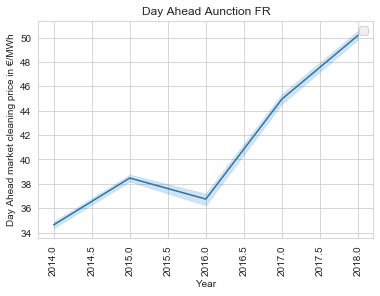

In [24]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x = da_data_n2["Year"], y = da_data_n2["Prices"], data = da_data_n2)
sns.set(rc={'figure.figsize':(15,7)})

plt.title("Day Ahead Aunction FR")
plt.xlabel("Year")
plt.ylabel("Day Ahead market cleaning price in €/MWh")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Text(0, 0.5, 'Day Ahead prices in €/MWh')

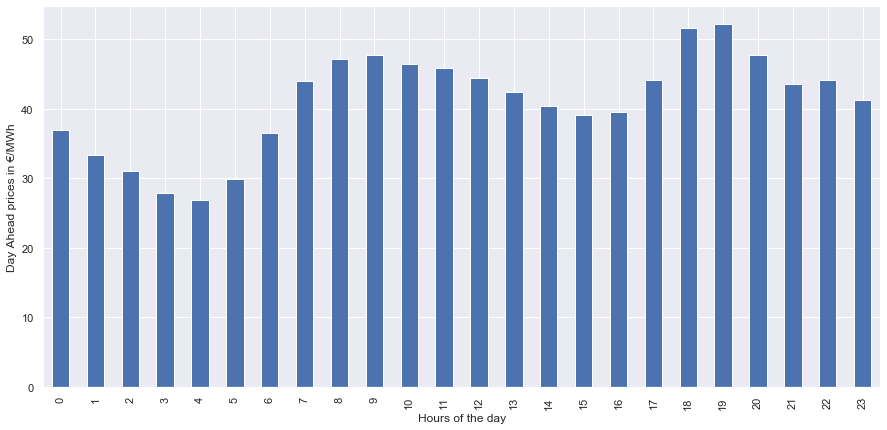

In [25]:
#plotting xa, Hourly Average
xa = avg_hour.plot(kind = 'bar')
xa.set_xlabel('Hours of the day', fontsize=12)
xa.set_ylabel('Day Ahead prices in €/MWh', fontsize=12)

Text(0, 0.5, 'Day Ahead prices in €/MWh')

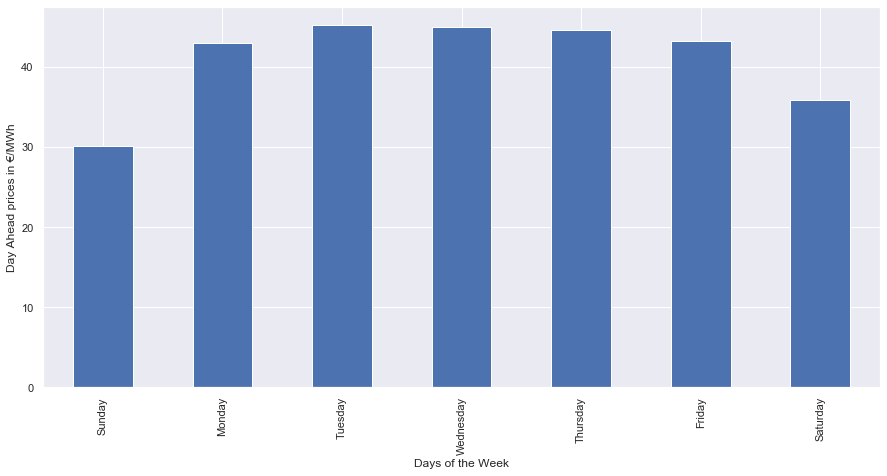

In [26]:
#plotting xb, Weekly Average
xb = avg_dow.plot(kind = 'bar')
xb.set_xlabel('Days of the Week', fontsize=12)
xb.set_ylabel('Day Ahead prices in €/MWh', fontsize=12)

Text(0, 0.5, 'Day Ahead prices in €/MWh')

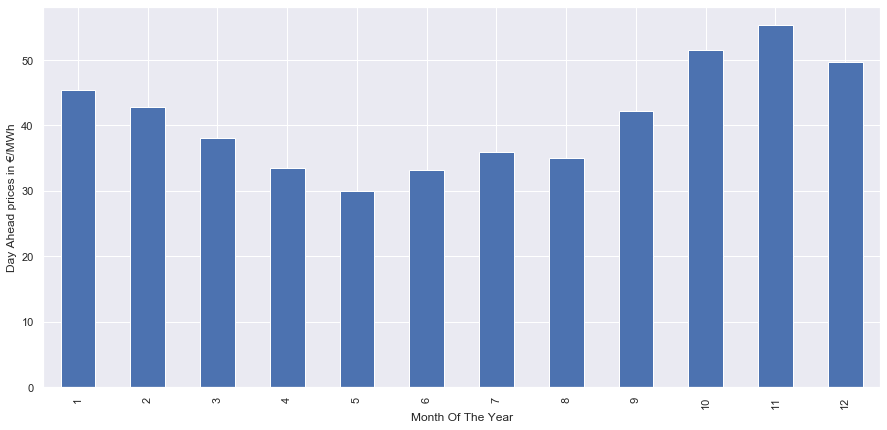

In [27]:
xc = avg_month.plot(kind = 'bar') #plotting xc, Monthly Average
xc.set_xlabel('Month Of The Year', fontsize=12)
xc.set_ylabel('Day Ahead prices in €/MWh', fontsize=12)

### Conclusions

We can see that electricity price data shows some very obvious temporal patterns. Electricity is cheaper in summer than in winter. While electricity costs most during workdays, it drops towards the weekend with lowest prices on Sunday. Over the course of a day, electricity is cheapest after midnight, peaks in the morning and evening hours and is a little lower during working hours. Those are very superficial analyses of temporal patterns, but it is obvious that there are some patterns available, that we should be able to extract from the data.

## ****************************************************************************************************

## Forecasting using SARIMA

In [28]:
for i in range(24):
    print('Hour' + str(i) + '=da_data_n2[da_data_n2["Hour"]==' + str(i) +']')

Hour0=da_data_n2[da_data_n2["Hour"]==0]
Hour1=da_data_n2[da_data_n2["Hour"]==1]
Hour2=da_data_n2[da_data_n2["Hour"]==2]
Hour3=da_data_n2[da_data_n2["Hour"]==3]
Hour4=da_data_n2[da_data_n2["Hour"]==4]
Hour5=da_data_n2[da_data_n2["Hour"]==5]
Hour6=da_data_n2[da_data_n2["Hour"]==6]
Hour7=da_data_n2[da_data_n2["Hour"]==7]
Hour8=da_data_n2[da_data_n2["Hour"]==8]
Hour9=da_data_n2[da_data_n2["Hour"]==9]
Hour10=da_data_n2[da_data_n2["Hour"]==10]
Hour11=da_data_n2[da_data_n2["Hour"]==11]
Hour12=da_data_n2[da_data_n2["Hour"]==12]
Hour13=da_data_n2[da_data_n2["Hour"]==13]
Hour14=da_data_n2[da_data_n2["Hour"]==14]
Hour15=da_data_n2[da_data_n2["Hour"]==15]
Hour16=da_data_n2[da_data_n2["Hour"]==16]
Hour17=da_data_n2[da_data_n2["Hour"]==17]
Hour18=da_data_n2[da_data_n2["Hour"]==18]
Hour19=da_data_n2[da_data_n2["Hour"]==19]
Hour20=da_data_n2[da_data_n2["Hour"]==20]
Hour21=da_data_n2[da_data_n2["Hour"]==21]
Hour22=da_data_n2[da_data_n2["Hour"]==22]
Hour23=da_data_n2[da_data_n2["Hour"]==23]


In [29]:
Hour0=da_data_n2[da_data_n2["Hour"]==0]
Hour1=da_data_n2[da_data_n2["Hour"]==1]
Hour2=da_data_n2[da_data_n2["Hour"]==2]
Hour3=da_data_n2[da_data_n2["Hour"]==3]
Hour4=da_data_n2[da_data_n2["Hour"]==4]
Hour5=da_data_n2[da_data_n2["Hour"]==5]
Hour6=da_data_n2[da_data_n2["Hour"]==6]
Hour7=da_data_n2[da_data_n2["Hour"]==7]
Hour8=da_data_n2[da_data_n2["Hour"]==8]
Hour9=da_data_n2[da_data_n2["Hour"]==9]
Hour10=da_data_n2[da_data_n2["Hour"]==10]
Hour11=da_data_n2[da_data_n2["Hour"]==11]
Hour12=da_data_n2[da_data_n2["Hour"]==12]
Hour13=da_data_n2[da_data_n2["Hour"]==13]
Hour14=da_data_n2[da_data_n2["Hour"]==14]
Hour15=da_data_n2[da_data_n2["Hour"]==15]
Hour16=da_data_n2[da_data_n2["Hour"]==16]
Hour17=da_data_n2[da_data_n2["Hour"]==17]
Hour18=da_data_n2[da_data_n2["Hour"]==18]
Hour19=da_data_n2[da_data_n2["Hour"]==19]
Hour20=da_data_n2[da_data_n2["Hour"]==20]
Hour21=da_data_n2[da_data_n2["Hour"]==21]
Hour22=da_data_n2[da_data_n2["Hour"]==22]
Hour23=da_data_n2[da_data_n2["Hour"]==23]

In [30]:
Hour0=Hour0.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour1=Hour1.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour2=Hour2.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour3=Hour3.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour4=Hour4.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour5=Hour5.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour6=Hour6.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour7=Hour7.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour8=Hour8.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour9=Hour9.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour10=Hour10.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour11=Hour11.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour12=Hour12.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour13=Hour13.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour14=Hour14.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour15=Hour15.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour16=Hour16.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour17=Hour17.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour18=Hour18.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour19=Hour19.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour20=Hour20.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour21=Hour21.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour22=Hour22.drop(columns = ['Year','Month','Week','Day','Hour'])
Hour23=Hour23.drop(columns = ['Year','Month','Week','Day','Hour'])

In [40]:
Hour_23 = Hour23.set_index(['DateTime'])
Hour_23.head()

,Prices
DateTime,
2014-01-01 23:00:00,12.95
2014-01-02 23:00:00,30.64
2014-01-03 23:00:00,32.22
2014-01-04 23:00:00,17.34
2014-01-05 23:00:00,22.08


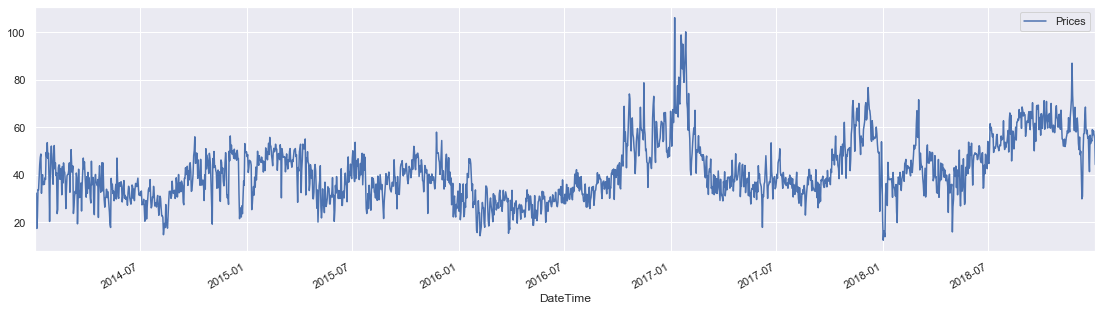

In [32]:
Hour_23.plot(figsize=(19,5))
plt.show()

In [33]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Hour_23,order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:18925.18606467543
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:17026.580905789488
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:13621.217313416768
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:13149.924035686832
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:13614.959317875677
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:13239.399117887562
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:13238.57827681303
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:13150.222472264439
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16809.407830259537
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:15377.052112975402
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:12994.749693025926
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:12365.409211003418
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:12979.843957819401
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:12457.306519099053
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:12544.65531440222
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:12364.927264624246
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:11900.31128176445
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:11815.637188933

In [35]:
#select the ARIMA with the lowest AIC "ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:11808.061231665091"
mod = sm.tsa.statespace.SARIMAX(Hour_23,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4507      0.028     16.094      0.000       0.396       0.506
ma.L1         -0.8396      0.018    -47.634      0.000      -0.874      -0.805
ar.S.L12      -0.0107      0.005     -2.010      0.044      -0.021      -0.000
ma.S.L12      -1.0000     18.677     -0.054      0.957     -37.606      35.606
sigma2        33.0615    617.613      0.054      0.957   -1177.438    1243.561


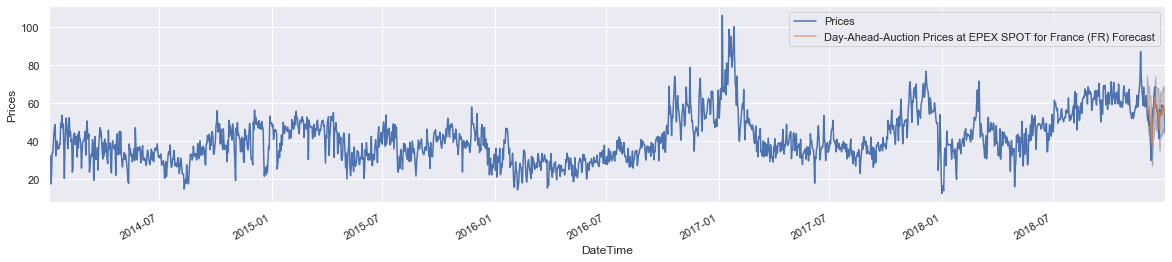

In [46]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-01 23:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = Hour_23['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label="Day-Ahead-Auction Prices at EPEX SPOT for France (FR) Forecast", alpha=.7, figsize=(20, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('DateTime')
ax.set_ylabel('Prices')
plt.legend()
plt.show()

# Visualization

In [47]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [48]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.layouts import row
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Blues8
from bokeh.layouts import gridplot
from bokeh.palettes import Viridis3

In [49]:
output_file('Clement_Bannem.html')

In [50]:
#Bokehing the Prices per Days of the week

auction_bokeh_day = da_data_n[['Day', 'Prices']].groupby('Day', as_index = False).mean()
day = auction_bokeh_day['Day']
price = auction_bokeh_day['Prices']

In [51]:
#Bokehing the Prices per month of the Year

auction_bokeh_month = da_data_n[['Month', 'Prices']].groupby('Month', as_index = False).mean()
month_m = auction_bokeh_month['Month']
price_m = auction_bokeh_month['Prices']

In [53]:
#Bokehing the Prices per hours of the Year

auction_bokeh_hours = da_data_n[['Hour', 'Prices']].groupby('Hour', as_index = False).mean()
hours_h = auction_bokeh_hours['Hour']
price_h = auction_bokeh_hours['Prices']

In [54]:
#Bokehing the Prices per Years

auction_bokeh_years = da_data_n[['Year', 'Prices']].groupby('Year', as_index = False).mean()
years_y = auction_bokeh_years['Year']
price_y = auction_bokeh_years['Prices']

In [55]:
source1 = ColumnDataSource(auction_bokeh_day)
source2 = ColumnDataSource(auction_bokeh_month)

In [61]:
#Add Plot
p1 = figure(
    
    #Use y_range for Day plotting and remove the y_range line to print numerical values (Month, Year, Time)
    
    y_range = day,
    title = 'Prices variations / Day',
#     plot_width = 600,
#     plot_height = 400,
    x_axis_label = 'Prices',
    #y_axis_label = 'Prices',
    tools = "pan,box_select,wheel_zoom,save,reset"
)

#Render Graph ***** BARS *****

p1.hbar(y = day,
       right = price,
       left = 0,
       height = 0.4,
       color = 'purple',
       fill_alpha = 0.5
      )

#Add tooltips
hover = HoverTool()
hover.tooltips = """
    <div>
        <h3>@Day<h3>
        <div><strong>Price: </strong>@price</div>
        <div><strong>Day: </strong>@day</div>
"""

In [62]:
#Add Plot
p2 = figure(
    
    #USe y_range for Day plotting and remove the y_range line to print numerical values (Month, Year, Time)
    
    #y_range = day,
    title = 'Prices variations / month',
#     plot_width = 600,
#     plot_height = 400,
    x_axis_label = 'Months',
    y_axis_label = 'Prices',
    tools = "pan,box_select,wheel_zoom,save,reset"
)
# Render Graph ***** LINE *****
p2.line(x = month_m, y = price_m, line_width = 2, color = 'orange', line_alpha = 0.5)

# Add tooltips
hover = HoverTool()
hover.tooltips = """
    <div>
        <h3>@month<h3>
        <div><strong>Price: </strong>@price</div>
        <div><strong>Month: </strong>@month</div>
"""

In [63]:
#Add Plot
p3 = figure(
    
    #USe y_range for Day plotting and remove the y_range line to print numerical values (Month, Year, Time)
    
    #y_range = day,
    title = 'Prices variations / Hours',
    x_axis_label = 'Hours',
    y_axis_label = 'Prices',
#     x_axis_type="datetime",
    tools = "pan,box_select,wheel_zoom,save,reset"
)
# Render Graph ***** LINE *****
p3.line(x = hours_h, y = price_h, line_width = 2, color = 'navy', line_alpha = 0.5)
p3.circle(x = hours_h, y = price_h, line_width = 2, fill_color = 'white', line_alpha = 0.5, size = 8)


# Add tooltips
hover = HoverTool()
hover.tooltips = """
    <div>
        <h3>@month<h3>
        <div><strong>Price: </strong>@price</div>
        <div><strong>Month: </strong>@month</div>
"""

In [64]:
#Add Plot
p4 = figure(
    
    #Use y_range for Day plotting and remove the y_range line to print numerical values (Month, Year, Time)
    
    #y_range = day,
    title = 'Prices variations / Years',
    x_axis_label = 'Year',
    y_axis_label = 'Prices',
    tools = "pan,box_select,wheel_zoom,save,reset"
)
# Render Graph ***** annulus *****

p4.annulus(x = years_y, y = price_y, inner_radius=0.1, outer_radius=0.25, fill_color = 'brown', alpha = 0.6)


# Add tooltips
hover = HoverTool()
hover.tooltips = """
    <div>
        <h3>@month<h3>
        <div><strong>Price: </strong>@price</div>
        <div><strong>Month: </strong>@month</div>
"""

In [65]:
# make a grid
grid = gridplot([p1, p2, p3, p4], ncols=2, plot_width=500, plot_height=300)
show(grid)
# show(row(p1, p2))